# Process expert evaluation

In [1]:
import pandas as pd

In [2]:
index = "Ind"
title = "title"
article = "text"
ground_truth = "summary"

files = [
    f"{ground_truth}.txt", # Dummy for summary field
    "mbart_predictions.txt",
    "mt5_predictions.txt",
    "summarunner_predictions.txt",
    "llama_7b_predictions.csv",
    "starling_predictions.csv",
    "yagpt_predictions.csv",
    "yagpt3_predictions.csv"
]
summaries_fields = []
metrics = [
    "Актуальность",
    "Последовательность",
    "Беглость",
    "Согласованность",
    "Комментарий"
]

for file in files:
    model_name = file.split(".")[0]
    summaries_fields.append(model_name)
    for metric in metrics:
        summaries_fields.append(f"{model_name}_{metric}")

In [3]:
summaries_fields_types = {field : ('Int64' if field.split("_")[-1] != metrics[-1] and field + ".txt" not in files and field + ".csv" not in files else str) for field in summaries_fields}
print(summaries_fields_types)
summaries_fields_types[index] = 'Int64'
summaries_fields_types[article] = summaries_fields_types[ground_truth] = str

{'summary': <class 'str'>, 'summary_Актуальность': 'Int64', 'summary_Последовательность': 'Int64', 'summary_Беглость': 'Int64', 'summary_Согласованность': 'Int64', 'summary_Комментарий': <class 'str'>, 'mbart_predictions': <class 'str'>, 'mbart_predictions_Актуальность': 'Int64', 'mbart_predictions_Последовательность': 'Int64', 'mbart_predictions_Беглость': 'Int64', 'mbart_predictions_Согласованность': 'Int64', 'mbart_predictions_Комментарий': <class 'str'>, 'mt5_predictions': <class 'str'>, 'mt5_predictions_Актуальность': 'Int64', 'mt5_predictions_Последовательность': 'Int64', 'mt5_predictions_Беглость': 'Int64', 'mt5_predictions_Согласованность': 'Int64', 'mt5_predictions_Комментарий': <class 'str'>, 'summarunner_predictions': <class 'str'>, 'summarunner_predictions_Актуальность': 'Int64', 'summarunner_predictions_Последовательность': 'Int64', 'summarunner_predictions_Беглость': 'Int64', 'summarunner_predictions_Согласованность': 'Int64', 'summarunner_predictions_Комментарий': <class

In [4]:
folder = "./human_annotations"
annotations_files = [
    "part1.csv",
    "part2.csv",
    "part3.csv",
    "part4.csv",
    "part5.csv"
]

data_dict = {}
for file in annotations_files:
    data = pd.read_csv(f"{folder}/{file}", dtype=summaries_fields_types)
    temp_data_dict = data.to_dict()
    for key, value in temp_data_dict.items():
        if key.split("_")[-1] in metrics:
            for i in range(len(temp_data_dict[key])):
                temp_data_dict[key][i] = [temp_data_dict[key][i]] if temp_data_dict[key][i] is not None else []
        if key not in data_dict:
            data_dict[key] = list(value.values())
            continue
        elif key.split("_")[-1] in metrics[:-1]:
            for i, val in enumerate(temp_data_dict[key].values()):
                try:
                    data_dict[key][i] += val
                except:
                    print(key, data_dict[key], "\n", temp_data_dict[key], val)
                    raise
        

In [5]:
print(data_dict.keys())

dict_keys(['Ind', 'text', 'summary', 'summary_Актуальность', 'summary_Последовательность', 'summary_Беглость', 'summary_Согласованность', 'summary_Комментарий', 'mbart_predictions', 'mbart_predictions_Актуальность', 'mbart_predictions_Последовательность', 'mbart_predictions_Беглость', 'mbart_predictions_Согласованность', 'mbart_predictions_Комментарий', 'mt5_predictions', 'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность', 'mt5_predictions_Беглость', 'mt5_predictions_Согласованность', 'mt5_predictions_Комментарий', 'summarunner_predictions', 'summarunner_predictions_Актуальность', 'summarunner_predictions_Последовательность', 'summarunner_predictions_Беглость', 'summarunner_predictions_Согласованность', 'summarunner_predictions_Комментарий', 'llama_7b_predictions', 'llama_7b_predictions_Актуальность', 'llama_7b_predictions_Последовательность', 'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность', 'llama_7b_predictions_Комментарий', 'starling_predict

## Statistics

In [6]:
summary_fields = [field for field in summaries_fields if field.split("_")[-1] != metrics[-1] and (field + ".txt") not in files and (field + ".csv") not in files]
print(summary_fields)

['summary_Актуальность', 'summary_Последовательность', 'summary_Беглость', 'summary_Согласованность', 'mbart_predictions_Актуальность', 'mbart_predictions_Последовательность', 'mbart_predictions_Беглость', 'mbart_predictions_Согласованность', 'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность', 'mt5_predictions_Беглость', 'mt5_predictions_Согласованность', 'summarunner_predictions_Актуальность', 'summarunner_predictions_Последовательность', 'summarunner_predictions_Беглость', 'summarunner_predictions_Согласованность', 'llama_7b_predictions_Актуальность', 'llama_7b_predictions_Последовательность', 'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность', 'starling_predictions_Актуальность', 'starling_predictions_Последовательность', 'starling_predictions_Беглость', 'starling_predictions_Согласованность', 'yagpt_predictions_Актуальность', 'yagpt_predictions_Последовательность', 'yagpt_predictions_Беглость', 'yagpt_predictions_Согласованность', 'yagpt3_pred

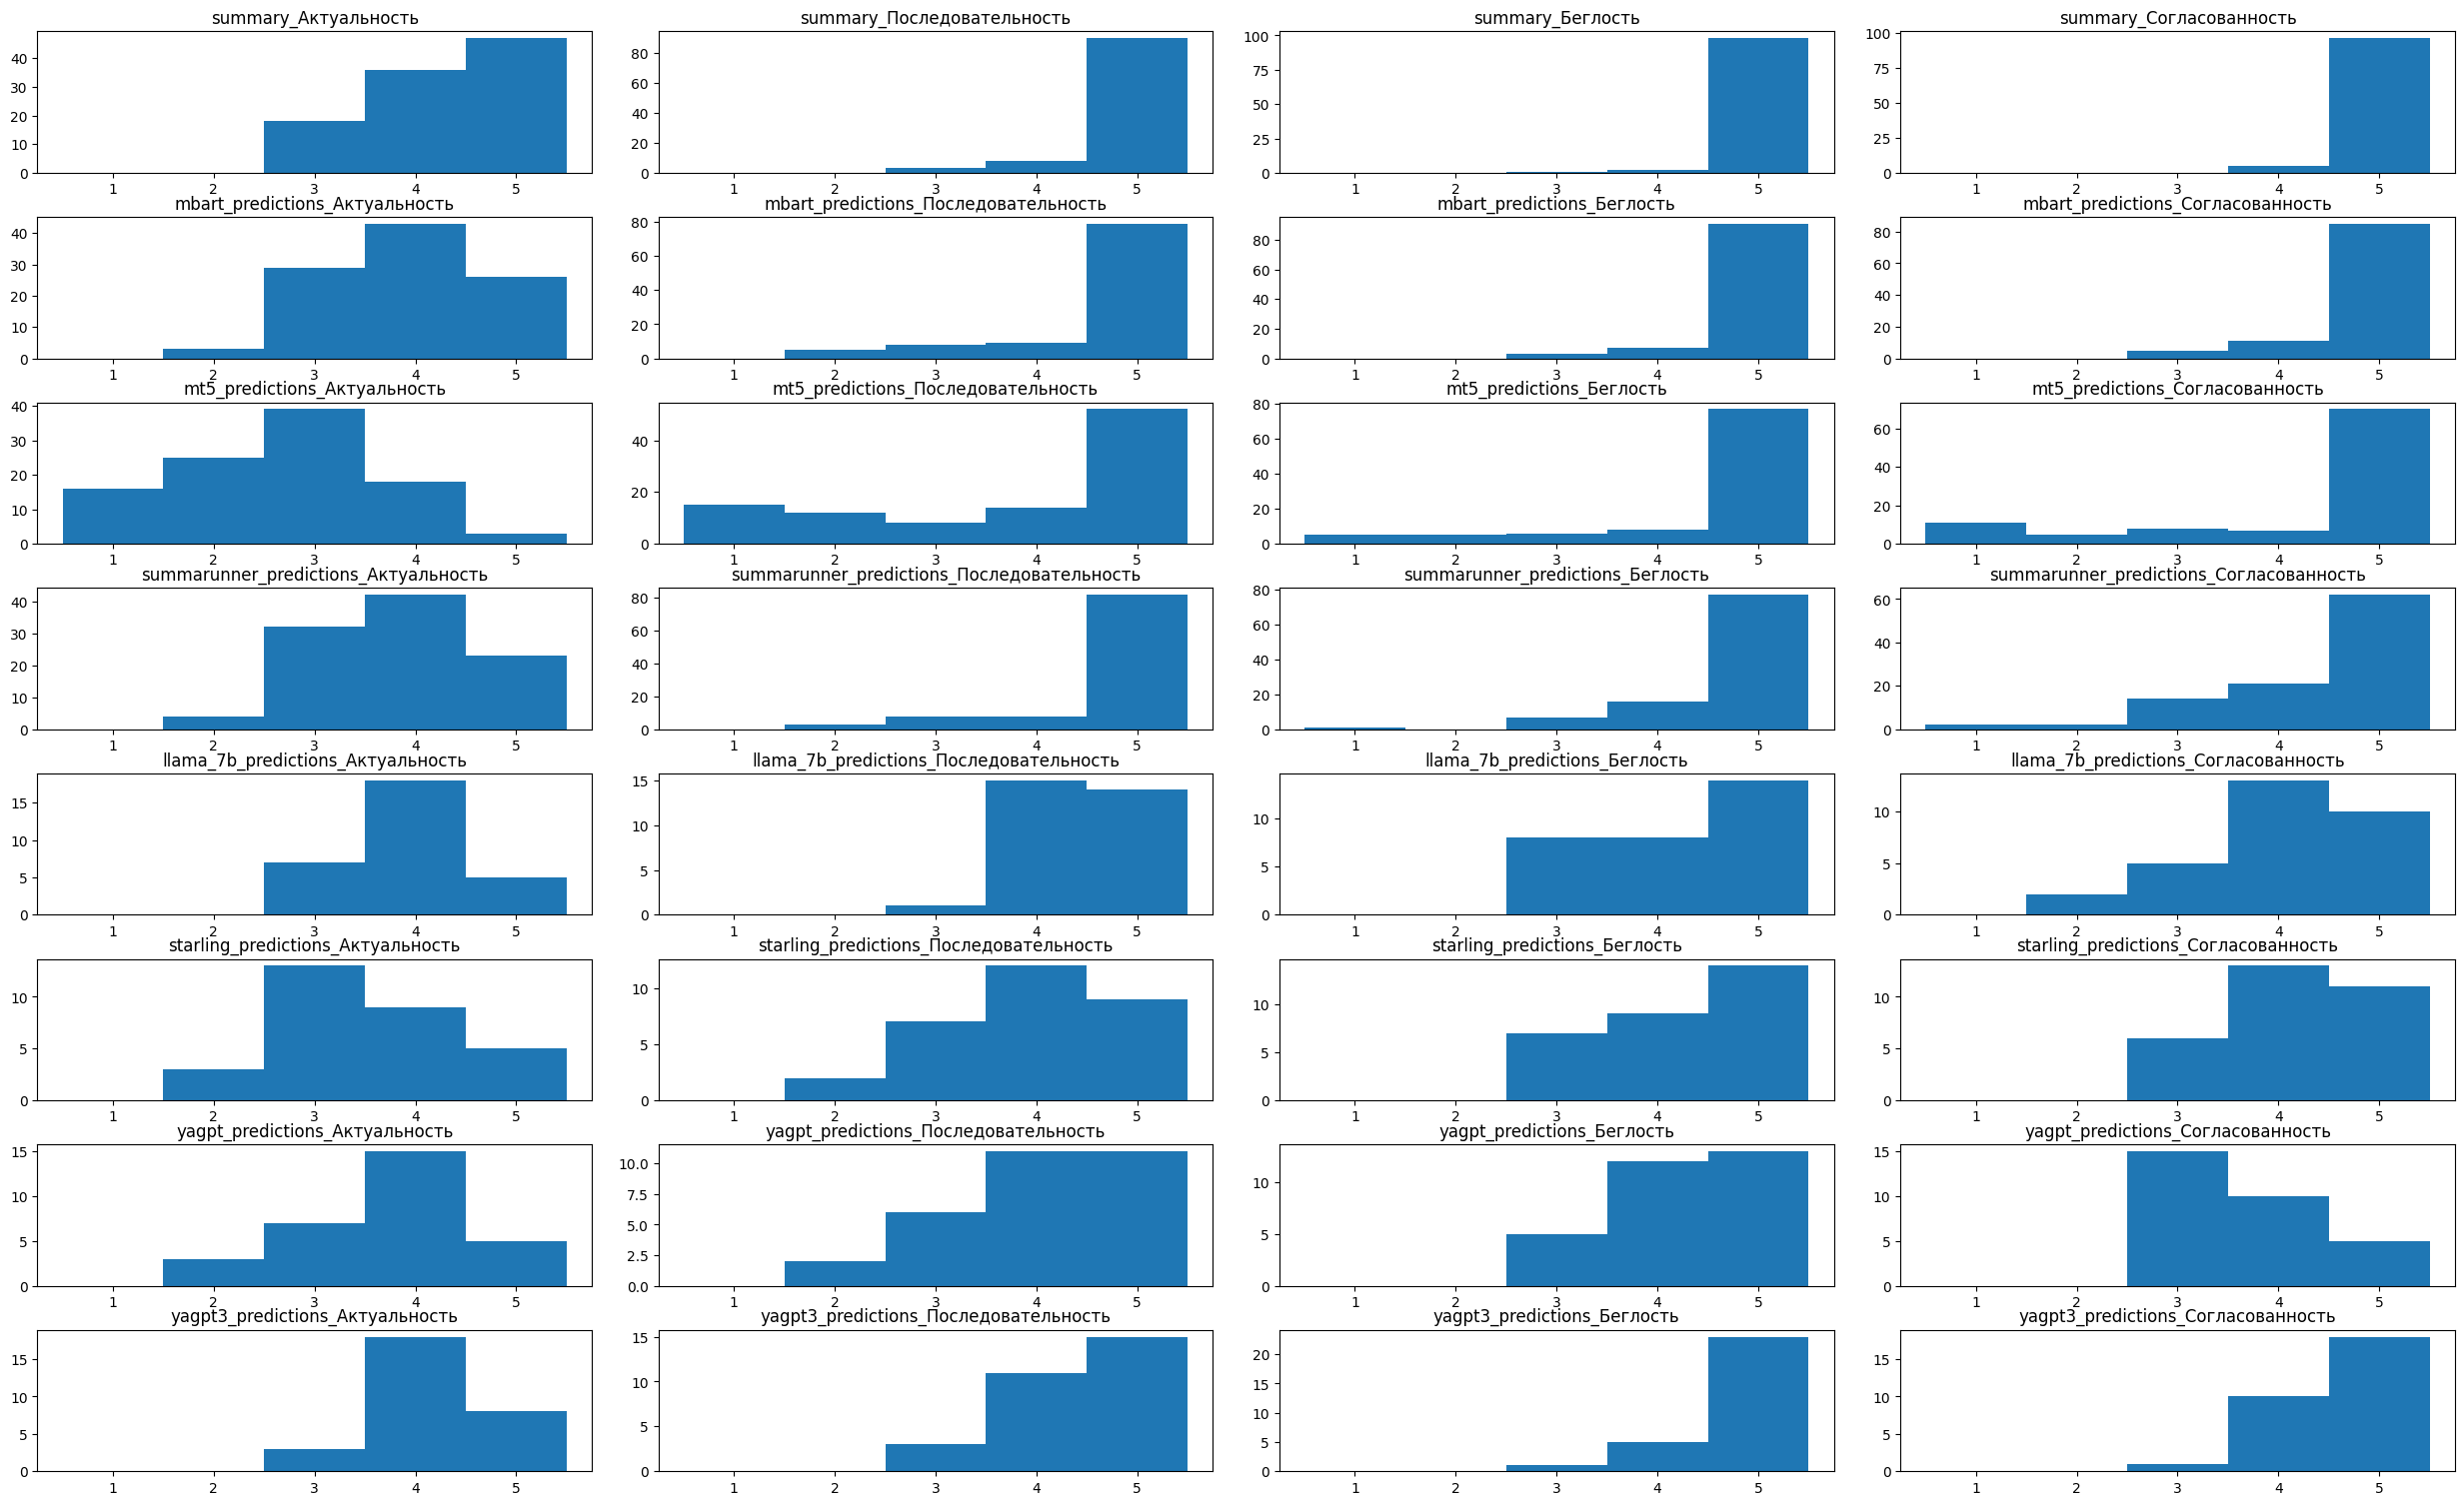

In [8]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(len(files), len(metrics[:-1]))
fig.set_figheight(15)
fig.set_figwidth(25)
fig.tight_layout()

for i, field in enumerate(summary_fields):
    ind = (i // len(metrics[:-1]), i % len(metrics[:-1]))
    axs[*ind].set_title(field)
    axs[*ind].hist([val for temp_val in data_dict[field] if isinstance(temp_val, list) for val in temp_val], bins=[b + 0.5 for b in range(0, 6)], )
    axs[*ind].locator_params(axis='x', integer=True)
plt.show()

ValueError: too many values to unpack (expected 2)

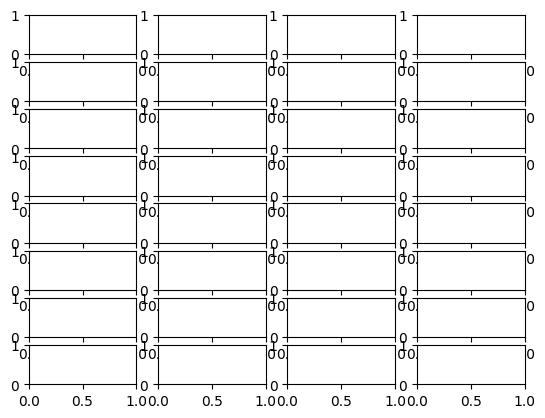

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
from matplotlib import pyplot as plt


figs = [plt.figure(1), plt.figure(2), plt.figure(3), plt.figure(4)]

for j in range(0, 4):
    #fig, axs = plt.subplots(len(files), len(metrics[:-1]))
    fig = figs[j]
    fig, axs = fig.subplots(len(files), len(metrics[:-1]))
    
    fig.set_figheight(15)
    fig.set_figwidth(25)
    fig.tight_layout()
    start = j
    while start < len(summary_fields):
        field = summary_fields[start]
        ind = (start // 4 % 2, 0 if start < 8 else 1)
        axs[*ind].set_title(field)
        axs[*ind].hist([val for temp_val in data_dict[field] if isinstance(temp_val, list) for val in temp_val], bins=[b + 0.5 for b in range(0, 6)], )
        axs[*ind].locator_params(axis='x', integer=True)
        start += 4
plt.show()
        
# for i, field in enumerate(summary_fields):
#     ind = (i // len(metrics[:-1]), i % len(metrics[:-1]))
#     axs[*ind].set_title(field)
#     axs[*ind].hist([val for temp_val in data_dict[field] if isinstance(temp_val, list) for val in temp_val], bins=[b + 0.5 for b in range(0, 6)], )
#     axs[*ind].locator_params(axis='x', integer=True)
# plt.show()

## Text clusters

In [1]:
auto_data = []
human_data = []
cluster_metrics = [
    "bleu",
    "rouge1",
    "meteor",
    "bertscore_f1"
]
models = [file.split(".")[0] for file in files[1:]]
summary_dataset = pd.read_csv("summary_dataset_with_bertscore_rouge_bleu_meteor.csv")

fig, axs = plt.subplots(1, len(cluster_metrics))
fig.set_figheight(5)
fig.set_figwidth(25)
for i, metric in enumerate(cluster_metrics):
    values = []
    for model in models:
        auto_metric_field_name = f"{model}_{metric}"
        values += list(summary_dataset[auto_metric_field_name])
    axs[i].set_title(metric)
    axs[i].hist(values, bins=50)

plt.show()

NameError: name 'files' is not defined

## Correlation (Kendall, per-system)

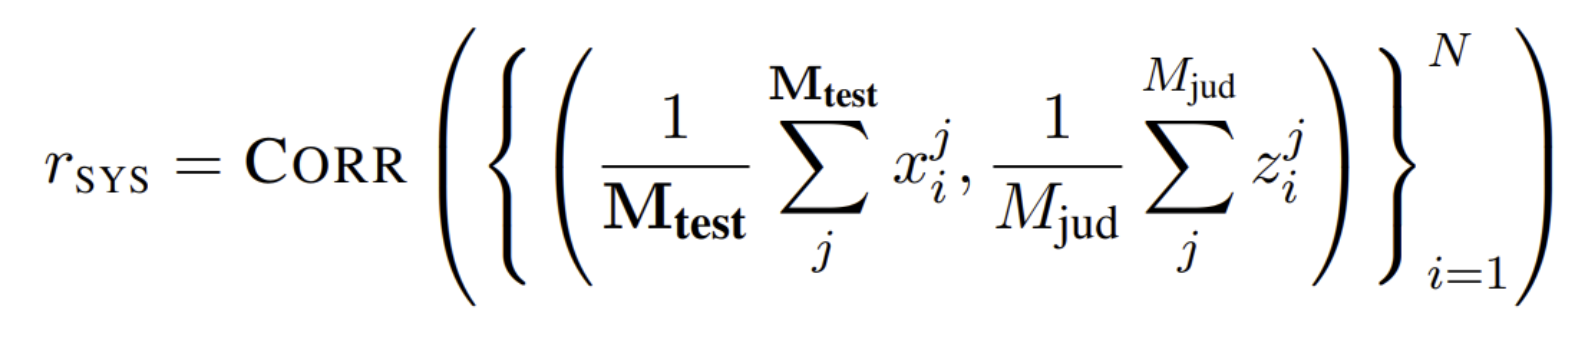

In [9]:
import scipy.stats as stats
import pandas as pd
import statistics

tau_metrics = metrics[:-1]
models = [file.split(".")[0] for file in files[1:]]
summary_dataset = pd.read_csv("summary_dataset_with_bertscore_rouge_meteor.csv")
summary_dataset.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Ind,title,text,summary,mbart_predictions,mt5_predictions,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,0,0,53,53,53,Названа опасность постоянно включенного Blueto...,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,Постоянно включенный Bluetooth на смартфоне гр...,"Эксперты предупреждают о том, что отключать Bl...",...,0.011561,0.102857,0.114286,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373
1,1,1,244,244,244,Колесникова проходит подозреваемой по делу о з...,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,Член президиума координационного совета оппози...,Член президиума координационного совета оппози...,...,0.031250,0.164948,0.175258,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195
2,2,2,260,260,260,Deutsche Bank: в мире наступает эпоха беспорядка,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,В 2020 году в мире наступит новая эпоха беспор...,Пандемия коронавируса привела к появлениям нов...,...,0.078431,0.193548,0.245161,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487
3,3,3,355,355,355,«Ъ»: Минтранс подготовил проект поправок к ПДД,ГИБДД совместно с Минтрансом разработала масшт...,Масштабный проект изменений в ПДД подготовили ...,ГИБДД совместно с Минтрансом разработала масшт...,В Госдуму вступили в силу поправки в правила д...,...,0.095238,0.224299,0.205607,0.306315,0.082645,0.233184,0.256739,0.270406,0.338463,0.296722
4,4,4,653,653,653,Tesla выпустит бюджетный беспилотник в 2023 году,Вечером 22 сентября на конференции Battery Day...,Миллиардер Илон Маск пообещал представить бюдж...,На конференции Battery Day глава Tesla Илон Ма...,Илон Маск рассчитывает вывести на рынок бюджет...,...,0.108434,0.190476,0.238095,0.098891,0.100573,0.146562,0.227205,0.193430,0.202198,0.251442


### ROUGE1

In [10]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_rouge1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [11]:
print(auto_data)
print(human_data)

[0.3132584410306658, 0.18770184990638483, 0.2773956250470432, 0.23633152652143022, 0.27970820232469806, 0.23762173845574566, 0.26362090158473467]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [12]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [13]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


### METEOR

In [14]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_meteor"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [15]:
print(auto_data)
print(human_data)

[0.24489541364112327, 0.10323753370134241, 0.2506747441997558, 0.24976855018268054, 0.24354940540884423, 0.24235216346974967, 0.2665891611576565]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [16]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [17]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


### BERTScore

In [18]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bertscore_f1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [19]:
print(auto_data)
print(human_data)

[0.6922733288544874, 0.6551174383897048, 0.669170290690202, 0.6805312119997464, 0.6846432328224182, 0.6843346494894761, 0.6859273704198691]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [20]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [21]:
print(tau, p_value)

0.04761904761904762 1.0


## Correlation (per-system, M_judge)

### ROUGE1

In [22]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_rouge1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [23]:
print(auto_data)
print(human_data)

[0.3132584410306658, 0.18770184990638483, 0.2773956250470432, 0.23633152652143022, 0.27970820232469806, 0.23762173845574566, 0.26362090158473467]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [24]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [25]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [26]:
from scipy.stats import bootstrap
import numpy as np
import math

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    print(tau)
    if math.isnan(tau):
        tau = 0
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)

0.47368421052631565
0.09999999999999999
-0.2
0.23809523809523814
-0.06666666666666665
0.4666666666666666
0.06666666666666665
0.3333333333333333
0.4666666666666666
0.2
0.2


In [27]:
print(bootstrap_samples.confidence_interval)

ConfidenceInterval(low=-0.0667777624066126, high=0.46978770336040715)


### METEOR

In [28]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_meteor"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [29]:
print(auto_data)
print(human_data)

[0.24489541364112327, 0.10323753370134241, 0.2506747441997558, 0.24976855018268054, 0.24354940540884423, 0.24235216346974967, 0.2665891611576565]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [30]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [31]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [32]:
from scipy.stats import bootstrap
import numpy as np

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    print(tau)
    if math.isnan(tau):
        tau = 0
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
print(bootstrap_samples.confidence_interval)

0.36842105263157887
0.3
0.6
0.23809523809523814
0.3333333333333333
0.4666666666666666
0.2
0.2
0.06666666666666665
0.06666666666666665
0.3333333333333333
ConfidenceInterval(low=nan, high=nan)


/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:153: RuntimeWarning: invalid value encountered in scalar divide
  alpha_1 = ndtr(z0_hat + num1/(1 - a_hat*num1))
/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:155: RuntimeWarning: invalid value encountered in scalar divide
  alpha_2 = ndtr(z0_hat + num2/(1 - a_hat*num2))
/tmp/ipykernel_314443/4012814051.py:13: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


### BERTScore

In [33]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bertscore_f1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if isinstance(data_dict[field][i], list) and len(data_dict[field][i]) > 0]) for i in range(100)]))

In [34]:
print(auto_data)
print(human_data)

[0.6922733288544874, 0.6551174383897048, 0.669170290690202, 0.6805312119997464, 0.6846432328224182, 0.6843346494894761, 0.6859273704198691]
[18.16, 15.1, 17.53, 4.98, 4.76, 4.71, 5.2]


In [35]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [36]:
print(tau, p_value)

0.04761904761904762 1.0


In [37]:
from scipy.stats import bootstrap
import numpy as np

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    if math.isnan(tau):
        tau = 0
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=1000, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
print(bootstrap_samples.confidence_interval)

ConfidenceInterval(low=-0.6842105263157894, high=0.6565388046206376)


## Correlation (per-input)

### ROUGE1

In [38]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_rouge1"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if len(data_dict[field][i]) > 0]))

    
    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
    # ci_min.append(ci.low)
    # ci_max.append(ci.high)
    
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_314443/3963064570.py:16: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [39]:
print(tau)
print(ci)

0.13303612813646604
[-0.18694582140273278, 0.38310102928040046]


### METEOR

In [40]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_meteor"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if len(data_dict[field][i]) > 0]))

    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
        
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_314443/3418075589.py:15: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [41]:
print(tau)
print(ci)

-0.045395280600320276
[-0.2926788720528339, 0.1736328686756069]


### BERTScore

In [42]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_bertscore_f1"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([statistics.mean(data_dict[field][i]) for field in human_metrics_fields if len(data_dict[field][i]) > 0]))

    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
        
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_314443/1676639163.py:15: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [43]:
print(tau)
print(ci)

-0.020348936189821608
[-0.3490099670808464, 0.24013315140571592]


## Export

In [44]:
print(data_dict.keys())
print(data_dict["yagpt_predictions"][:2])

dict_keys(['Ind', 'text', 'summary', 'summary_Актуальность', 'summary_Последовательность', 'summary_Беглость', 'summary_Согласованность', 'summary_Комментарий', 'mbart_predictions', 'mbart_predictions_Актуальность', 'mbart_predictions_Последовательность', 'mbart_predictions_Беглость', 'mbart_predictions_Согласованность', 'mbart_predictions_Комментарий', 'mt5_predictions', 'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность', 'mt5_predictions_Беглость', 'mt5_predictions_Согласованность', 'mt5_predictions_Комментарий', 'summarunner_predictions', 'summarunner_predictions_Актуальность', 'summarunner_predictions_Последовательность', 'summarunner_predictions_Беглость', 'summarunner_predictions_Согласованность', 'summarunner_predictions_Комментарий', 'llama_7b_predictions', 'llama_7b_predictions_Актуальность', 'llama_7b_predictions_Последовательность', 'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность', 'llama_7b_predictions_Комментарий', 'starling_predict

In [45]:
print(summary_dataset.columns)

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Ind',
       'title', 'text', 'summary', 'mbart_predictions', 'mt5_predictions',
       'summarunner_predictions', 'llama_7b_predictions',
       'starling_predictions', 'yagpt_predictions', 'yagpt3_predictions',
       'mbart_predictions_bertscore_precision',
       'mbart_predictions_bertscore_recall', 'mbart_predictions_bertscore_f1',
       'mt5_predictions_bertscore_precision',
       'mt5_predictions_bertscore_recall', 'mt5_predictions_bertscore_f1',
       'summarunner_predictions_bertscore_precision',
       'summarunner_predictions_bertscore_recall',
       'summarunner_predictions_bertscore_f1',
       'llama_7b_predictions_bertscore_precision',
       'llama_7b_predictions_bertscore_recall',
       'llama_7b_predictions_bertscore_f1',
       'starling_predictions_bertscore_precision',
       'starling_predictions_bertscore_recall',
       'starling_predictions_bertscore_f1',
       'yagpt_predictions_berts

In [46]:
keys = data_dict.keys()
for key in keys:
    if "Комментарий" in key:
        continue
    if (isinstance(data_dict[key][0], list)):
        for i in range(len(data_dict[key])):
            data_dict[key][i] = np.mean(data_dict[key][i]) if data_dict[key][i] else None

In [47]:
print(data_dict["yagpt_predictions"][:2])

[nan, nan]


In [48]:
predictions = [
    "mbart_predictions",
    "mt5_predictions",
    "summarunner_predictions",
    "llama_7b_predictions",
    "starling_predictions",
    "yagpt_predictions",
    "yagpt3_predictions"
]

export_data = pd.DataFrame(data_dict)
print(summary_dataset.columns)
#summary_dataset = summary_dataset.rename(columns={'Unnamed: 0.1': 'Ind'})

#full_export_data = export_data[export_data["Ind"].isin(list(summary_dataset["Ind"]))]
full_export_data = export_data
print(len(full_export_data), len(summary_dataset))
full_export_data = pd.concat([full_export_data.set_index("Ind"), summary_dataset.set_index("Ind")], axis=1).reset_index()
#full_export_data = pd.concat([full_export_data.drop(predictions, axis=1), summary_dataset.set_index(full_export_data.index)], axis=1)
#full_export_data = full_export_data.loc[:,~full_export_data.columns.duplicated()].copy()
# print(full_export_data[full_export_data.columns.duplicated()])
#full_export_data = full_export_data[full_export_data["yagpt_predictions"] != "К сожалению, я не могу ничего сказать об этом. Давайте сменим тему?"]
full_export_data.head()

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Ind',
       'title', 'text', 'summary', 'mbart_predictions', 'mt5_predictions',
       'summarunner_predictions', 'llama_7b_predictions',
       'starling_predictions', 'yagpt_predictions', 'yagpt3_predictions',
       'mbart_predictions_bertscore_precision',
       'mbart_predictions_bertscore_recall', 'mbart_predictions_bertscore_f1',
       'mt5_predictions_bertscore_precision',
       'mt5_predictions_bertscore_recall', 'mt5_predictions_bertscore_f1',
       'summarunner_predictions_bertscore_precision',
       'summarunner_predictions_bertscore_recall',
       'summarunner_predictions_bertscore_f1',
       'llama_7b_predictions_bertscore_precision',
       'llama_7b_predictions_bertscore_recall',
       'llama_7b_predictions_bertscore_f1',
       'starling_predictions_bertscore_precision',
       'starling_predictions_bertscore_recall',
       'starling_predictions_bertscore_f1',
       'yagpt_predictions_berts

,Ind,text,summary,summary_Актуальность,summary_Последовательность,summary_Беглость,summary_Согласованность,summary_Комментарий,mbart_predictions,mbart_predictions_Актуальность,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,53,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,5.0,5.0,5.0,5.0,[nan],Постоянно включенный Bluetooth на смартфоне гр...,4.0,...,0.011561,0.102857,0.114286,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373
1,204,Китайское издание Sina высоко оценило новый ро...,Новый российский боевой железнодорожный ракетн...,5.0,5.0,5.0,5.0,[nan],Китайское издание Sina высоко оценило новый ро...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,217,8 сентября в Японии официально стартовала изби...,Генеральный секретарь кабинета министров Япони...,5.0,5.0,5.0,5.0,[nan],В Японии официально стартовала избирательная к...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,244,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,5.0,5.0,5.0,5.0,[nan],Член президиума координационного совета оппози...,4.0,...,0.031250,0.164948,0.175258,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195
4,260,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,5.0,5.0,5.0,5.0,[nan],В 2020 году в мире наступит новая эпоха беспор...,4.0,...,0.078431,0.193548,0.245161,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487


In [49]:
print(len(full_export_data))
full_export_data.to_csv("export_data.csv", index=False)

100
